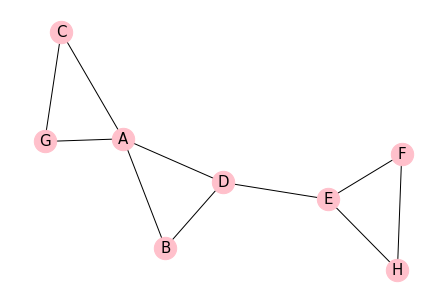


Results for Agent: A
Subset of agents reachable from A within exactly two retransmissions: {'B', 'C', 'E', 'G', 'D'}
There is a direct connection from A to node B
Therefore agent B is a trusted agent and has valid information
There is a direct connection from A to node C
Therefore agent C is a trusted agent and has valid information
There is a direct connection from A to node G
Therefore agent G is a trusted agent and has valid information
There is a direct connection from A to node D
Therefore agent D is a trusted agent and has valid information

Results for Agent: C
Subset of agents reachable from C within exactly two retransmissions: {'G', 'A', 'B', 'D'}
There is a direct connection from C to node G
Therefore agent G is a trusted agent and has valid information
There is a direct connection from C to node A
Therefore agent A is a trusted agent and has valid information

Results for Agent: B
Subset of agents reachable from B within exactly two retransmissions: {'C', 'E', 'G', 'A', 'D

In [62]:
import networkx as nx
import matplotlib.pyplot as plt

connections = "[Alpha-Charlie]; [Alpha-Bravo]; [Alpha-Golf]; [Bravo-Delta]; [Charlie-Golf]; [Delta-Alpha]; [Delta-Echo]; [Echo-Fox]; [Echo-Hotel]; [Fox-Hotel];"

# Extract edges from decrypted message
edges = [connection.strip('[];') for connection in connections.split() if '-' in connection]

# Create the graph with the appropriate edges
G = nx.Graph()
for edge in edges:
    node1, node2 = edge.split('-')
    G.add_edge(node1[0], node2[0])
    
# Draw the graph
nx.draw(G, with_labels=True, node_color='pink', node_size=500, font_size=15)

# Show the graph
plt.show()

def dfs(graph, start_node, visited=None, depth=0):
    if visited is None:
        visited = set()
    visited.add(start_node)
    if depth == 2:
        return visited
    for i in graph[start_node]:
        visited.update(dfs(graph, i, visited, depth + 1))
    return visited - {start_node}


for node in G.nodes():
    print("\nResults for Agent:", node)
    subset = dfs(G, node)
    print(f"Subset of agents reachable from {node} within exactly two retransmissions: {subset}")
    for subnode in subset:
        if G.has_edge(node, subnode):
            print("There is a direct connection from", node, "to node", subnode)  
            print("Therefore agent", subnode, "is a trusted agent and has valid information")
            
